In [103]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "plant-disease-classification"

# **Table of Contents**
----------------------
✅ **Load Libraries.**   
✅ **Data Load with EDA.**   
✅ **Data Transformation.**   
✅ **Data Visulaization.**   
✅ **Prediction Modeling and ML.**   

# 1. **Load Libraries.**

In [104]:
library(tidymodels)
library(tidyverse)
library(dplyr)
library(ggplot2)
library(gridExtra)
library(psych)
library(ggcorrplot)
library(GGally)

# **2. Data Load with EDA.**

In [105]:
df <- read.csv('/kaggle/input/plant-disease-classification/plant_disease_dataset.csv') %>% janitor::clean_names()

## **Data Description**
* **temperature**: Measured in degrees Celsius   
* **humidity**: Measured as percentage     
* **rainfall**: Measured in millimeters   
* **soil_pH**: Acidity/alkalinity measurement    
* **disease_present**: Binary label (0 = healthy, 1 = diseased)

[DataSet Check or Another Notebook](https://www.kaggle.com/datasets/turakut/plant-disease-classification/data)

## **Summary** 

In [106]:
glimpse(df)

Rows: 10,000
Columns: 5
$ temperature     <dbl> 27.48357, 24.30868, 28.23844, 32.61515, 23.82923, 23.8…
$ humidity        <dbl> 33.21505, 36.94501, 34.02619, 41.10418, 51.97179, 32.2…
$ rainfall        <dbl> 0.5727578, 42.5223463, 16.0953032, 20.3110155, 11.8513…
$ soil_p_h        <dbl> 4.975875, 8.165266, 6.316734, 6.164949, 8.482468, 5.72…
$ disease_present <int> 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


In [107]:
summary(df)

  temperature        humidity          rainfall           soil_p_h    
 Min.   : 5.388   Min.   :  6.244   Min.   : 0.00006   Min.   :4.000  
 1st Qu.:21.816   1st Qu.: 40.773   1st Qu.: 2.81282   1st Qu.:5.123  
 Median :25.293   Median : 72.212   Median : 6.86490   Median :6.232  
 Mean   :25.612   Mean   : 62.119   Mean   : 9.80752   Mean   :6.246  
 3rd Qu.:28.916   3rd Qu.: 81.033   3rd Qu.:13.44287   3rd Qu.:7.386  
 Max.   :56.686   Max.   :102.395   Max.   :84.65416   Max.   :8.500  
 disease_present
 Min.   :0.000  
 1st Qu.:0.000  
 Median :0.000  
 Mean   :0.241  
 3rd Qu.:0.000  
 Max.   :1.000  

In [108]:
describe(df)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
temperature,1,10000,25.612191,5.8138408,25.293238,25.373027,5.256269,5.387999e+00,56.686495,51.298496,0.61629908,1.5249989,0.058138408
humidity,2,10000,62.119300,22.6799766,72.211752,62.532369,26.192457,6.244209e+00,102.395421,96.151212,-0.17570745,-1.3369008,0.226799766
rainfall,3,10000,9.807522,9.8521302,6.864898,8.132218,6.995749,5.536691e-05,84.654161,84.654106,2.04930176,6.1181243,0.098521302
soil_p_h,4,10000,6.245855,1.3024647,6.232188,6.243429,1.680753,4.000075e+00,8.499875,4.499799,0.01803055,-1.2044604,0.013024647
disease_present,5,10000,0.241000,0.4277117,0.000000,0.176250,0.000000,0.000000e+00,1.000000,1.000000,1.21097507,-0.5335927,0.004277117


In [109]:
skim_df <- skimr::skim(df)
print(skim_df)

── Data Summary ────────────────────────
                           Values
Name                       df    
Number of rows             10000 
Number of columns          5     
_______________________          
Column type frequency:           
  numeric                  5     
________________________         
Group variables            None  

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable   n_missing complete_rate   mean     sd        p0   p25   p50
1 temperature             0             1 25.6    5.81  5.39      21.8  25.3 
2 humidity                0             1 62.1   22.7   6.24      40.8  72.2 
3 rainfall                0             1  9.81   9.85  0.0000554  2.81  6.86
4 soil_p_h                0             1  6.25   1.30  4.00       5.12  6.23
5 disease_present         0             1  0.241  0.428 0          0     0   
    p75   p100 hist 
1 28.9   56.7  ▁▇▆▁▁
2 81.0  102.   ▁▆▃▇▅
3 13.4   84.7  ▇▂▁▁▁
4  7.39   8.50 ▇▇▇▇

## **Checking Missing Value & Duplicate Value**

In [110]:
na <- data.frame(Na_Count = colSums(is.na(df)))
na

,Na_Count
,<dbl>
temperature,0
humidity,0
rainfall,0
soil_p_h,0
disease_present,0


In [111]:
sum(duplicated(df))

[1] 0

In [112]:
head(df,3)

,temperature,humidity,rainfall,soil_p_h,disease_present
,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,27.48357,33.21505,0.5727578,4.975875,1
2,24.30868,36.94501,42.5223463,8.165266,0
3,28.23844,34.02619,16.0953032,6.316734,1


# **2. DataTransformation**

# **3. Data Visualization**

In [113]:
num_cols <- df %>% select(where(is.numeric)) %>% colnames()
cat_cols <- df %>% select(where(is.factor)) %>% colnames()
cat('num_cols :', num_cols,'\n')
cat('cat_cols :', cat_cols)

num_cols : temperature humidity rainfall soil_p_h disease_present 
cat_cols : 

## **Histogram & Boxplot & Densityplot**

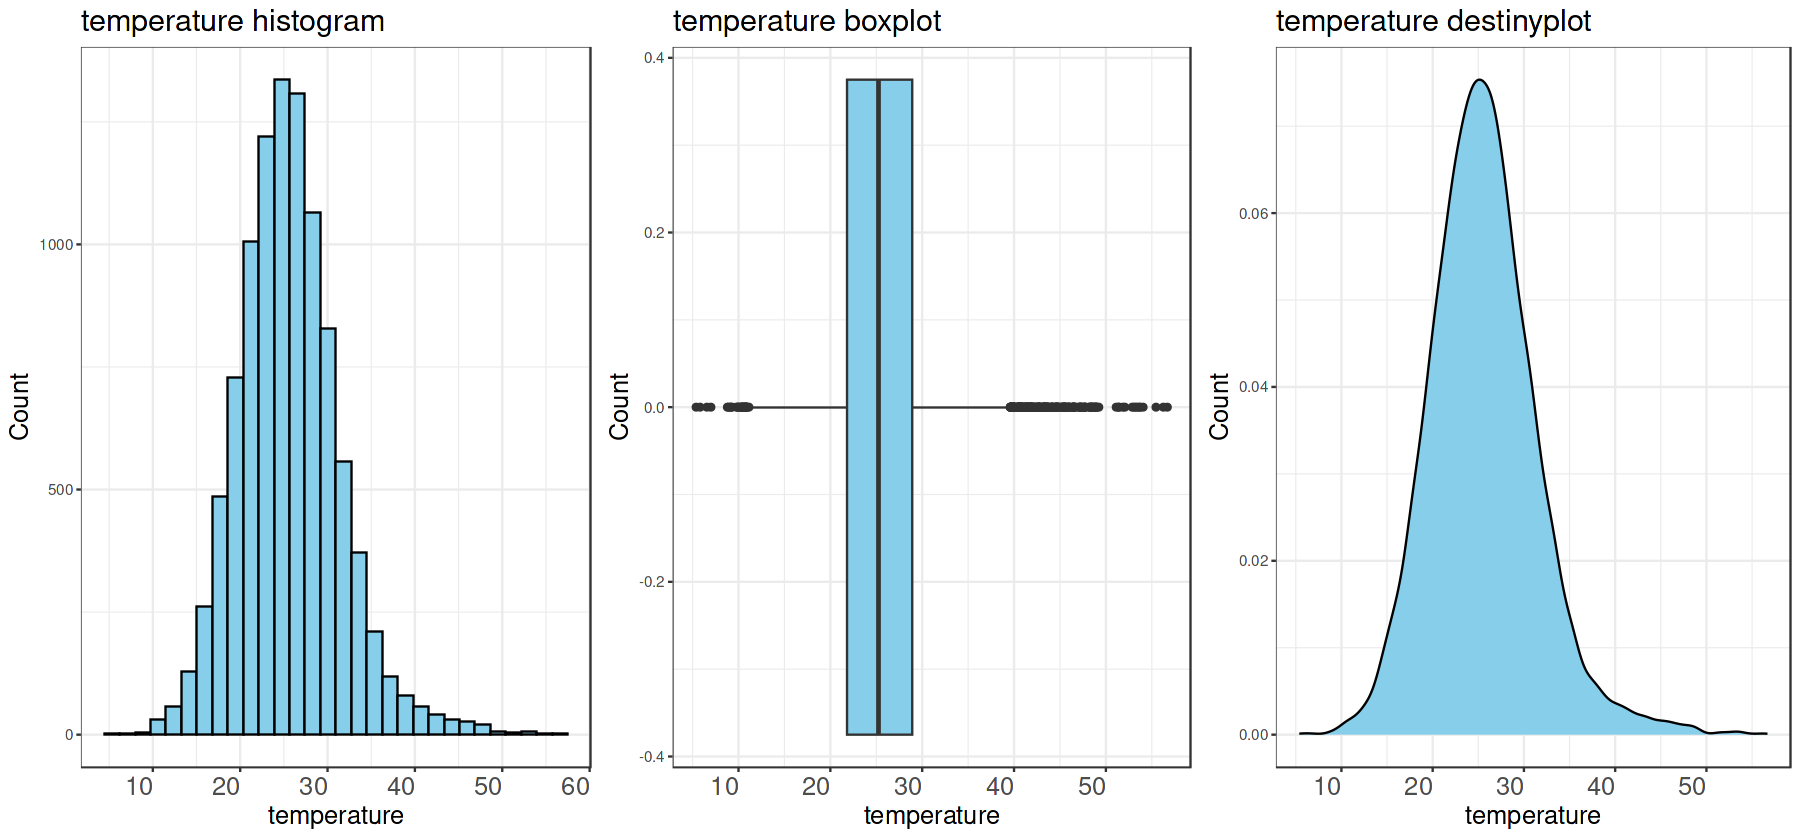

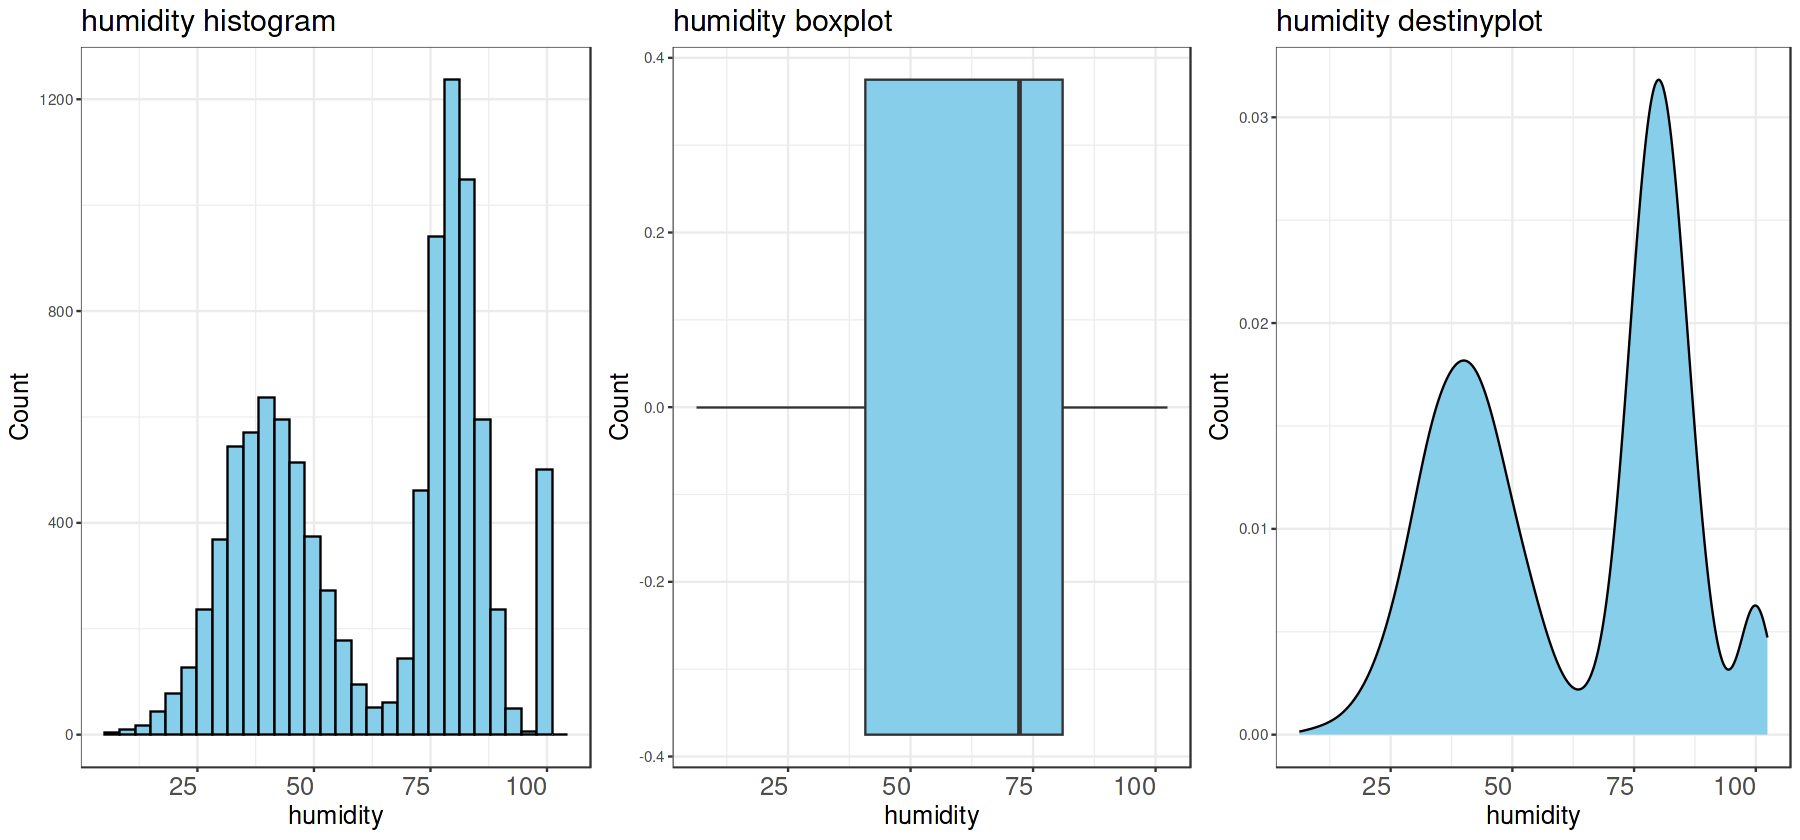

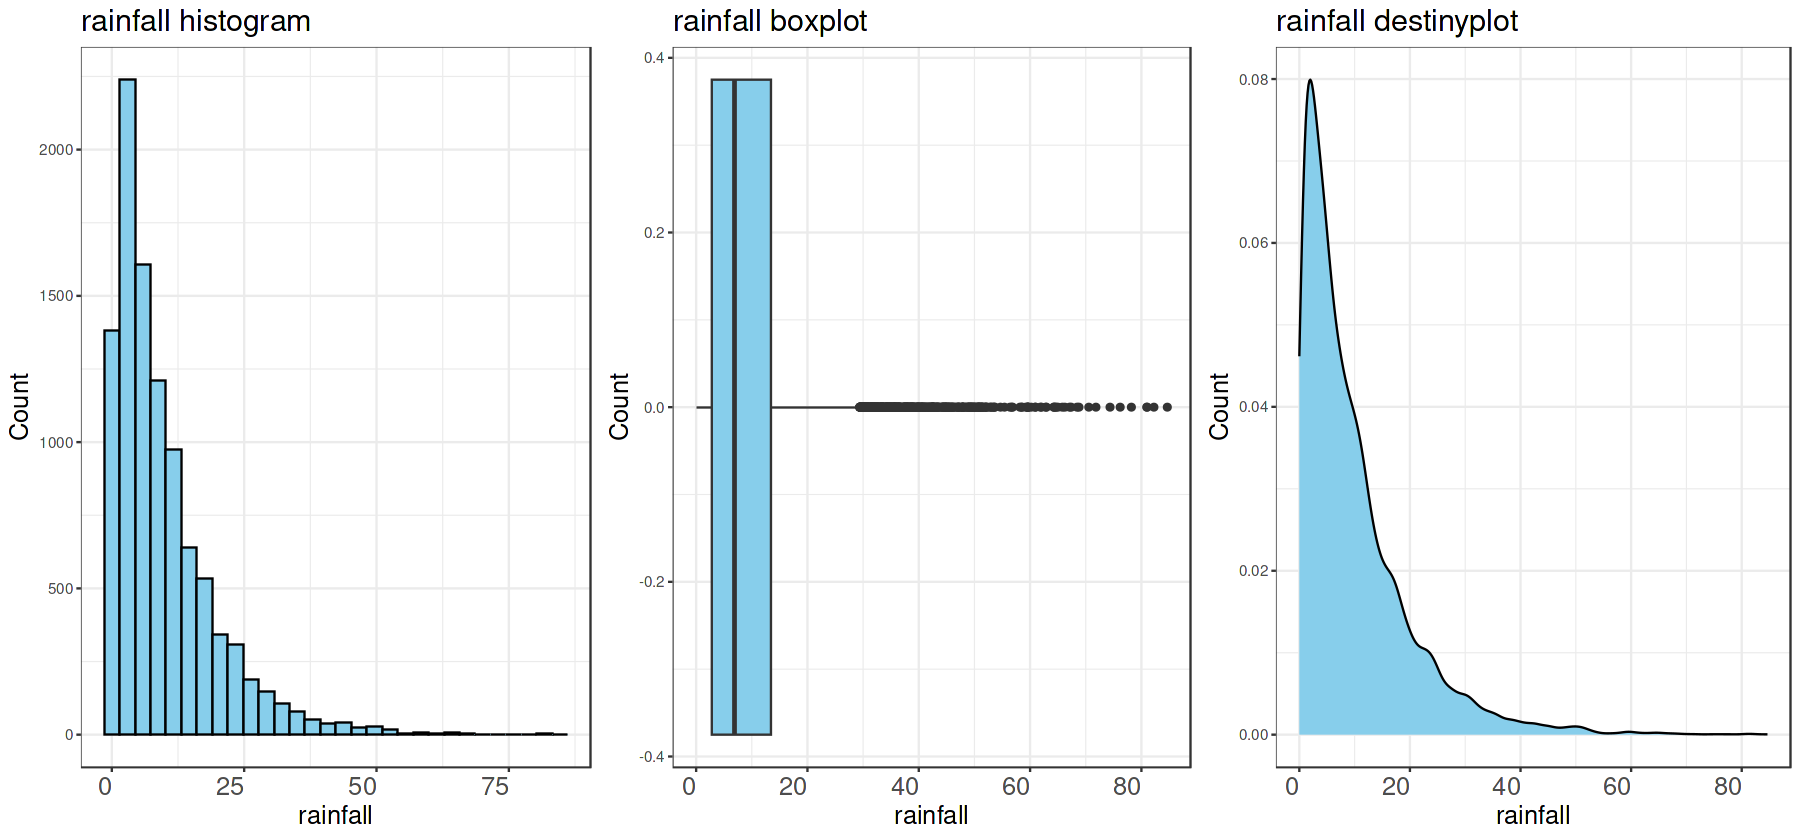

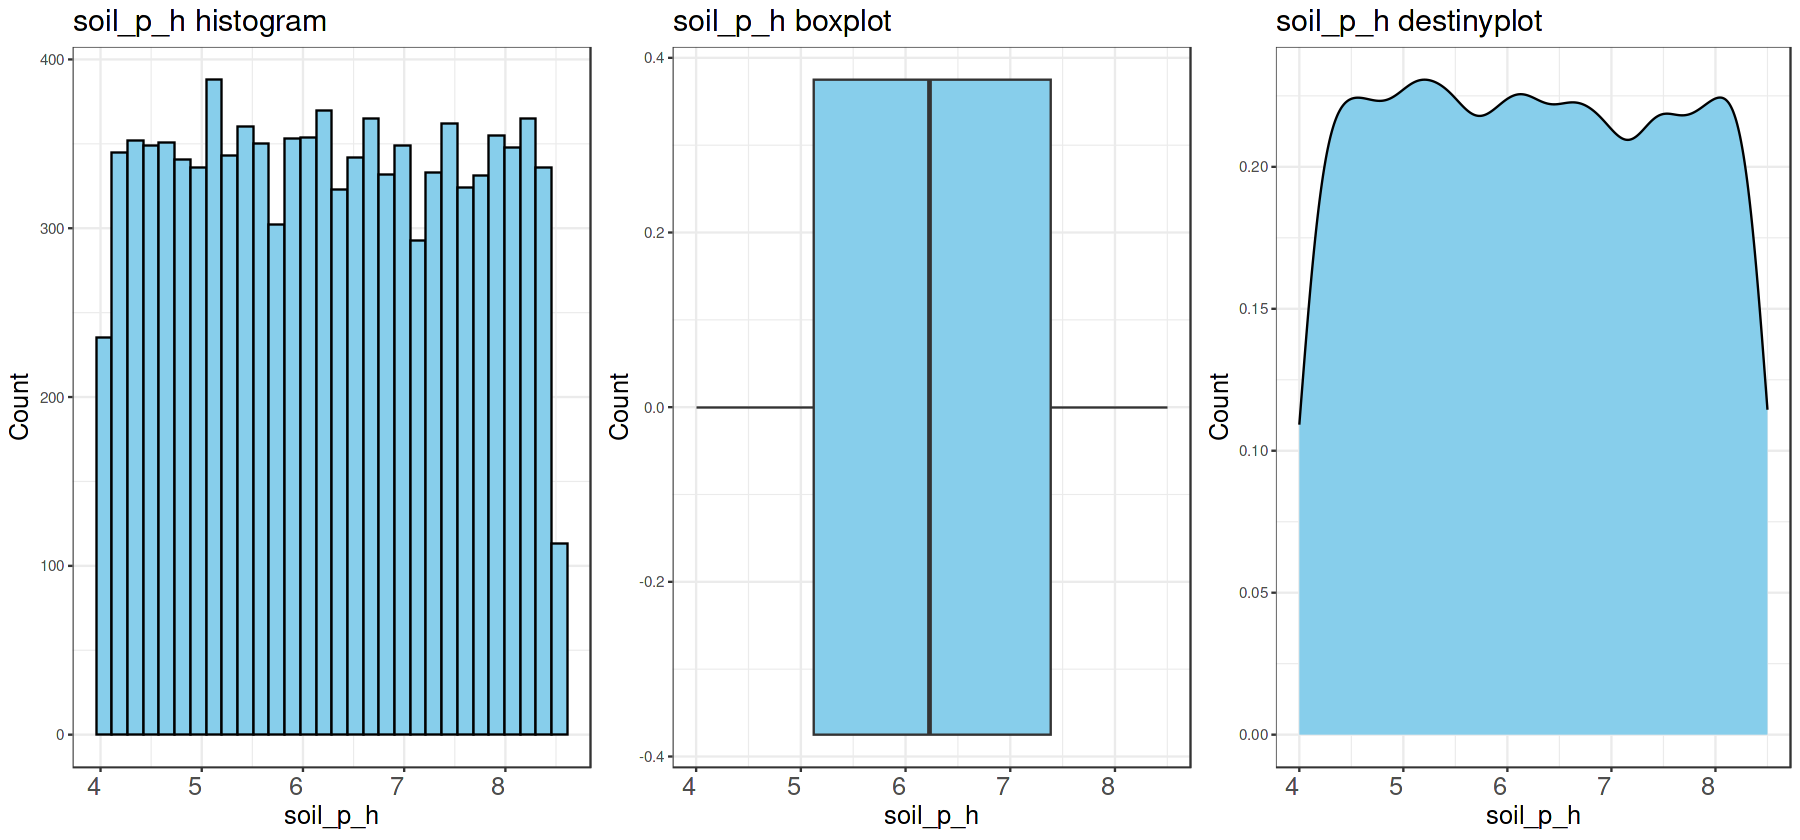

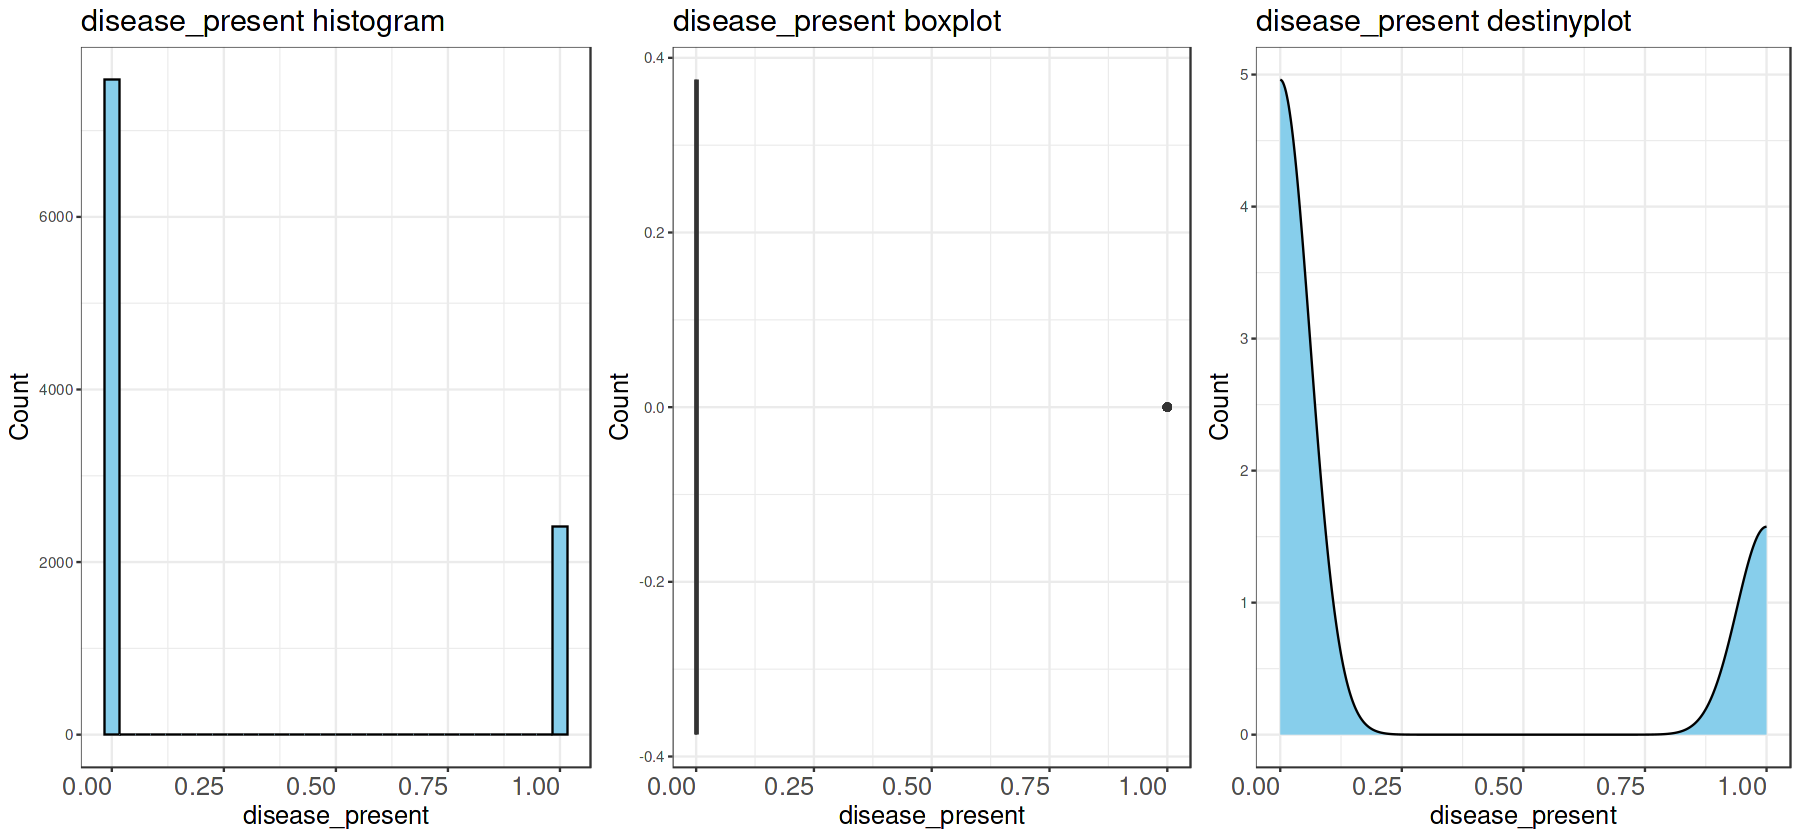

In [114]:
options(repr.plot.width = 15.0, repr.plot.height = 7.0)

for(i in num_cols){
    col_name <- i 
    a <- ggplot(df) + geom_histogram(aes(x= .data[[col_name]]), fill = 'skyblue', col = 'black', position = 'dodge', bins= 30) + 
            labs(title = paste0(names(df[i]),' histogram'), x = names(df[i]), y = 'Count') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            )
    
    b <- ggplot(df) + geom_boxplot(aes(x= .data[[col_name]]), fill = 'skyblue') + 
            labs(title = paste0(names(df[i]),' boxplot'), x = names(df[i]), y = 'Count') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            ) 

    c <- ggplot(df) + geom_density(aes(x= .data[[col_name]]), fill = 'skyblue') + 
            labs(title = paste0(names(df[i]),' destinyplot'), x = names(df[i]), y = 'Count') + 
            theme_bw() +
            theme(axis.title = element_text(size=15),
            axis.text.x = element_text(size = 15, hjust=1),
            title = element_text(size=15)
            ) 
    
    grid.arrange(a,b ,c, ncol = 3)    
}

## **CountPlot**

In [115]:
target <- df %>%  
        count(disease_present) %>%
        mutate(pct = paste(round(n / sum(n) * 100 ,1),'%'))

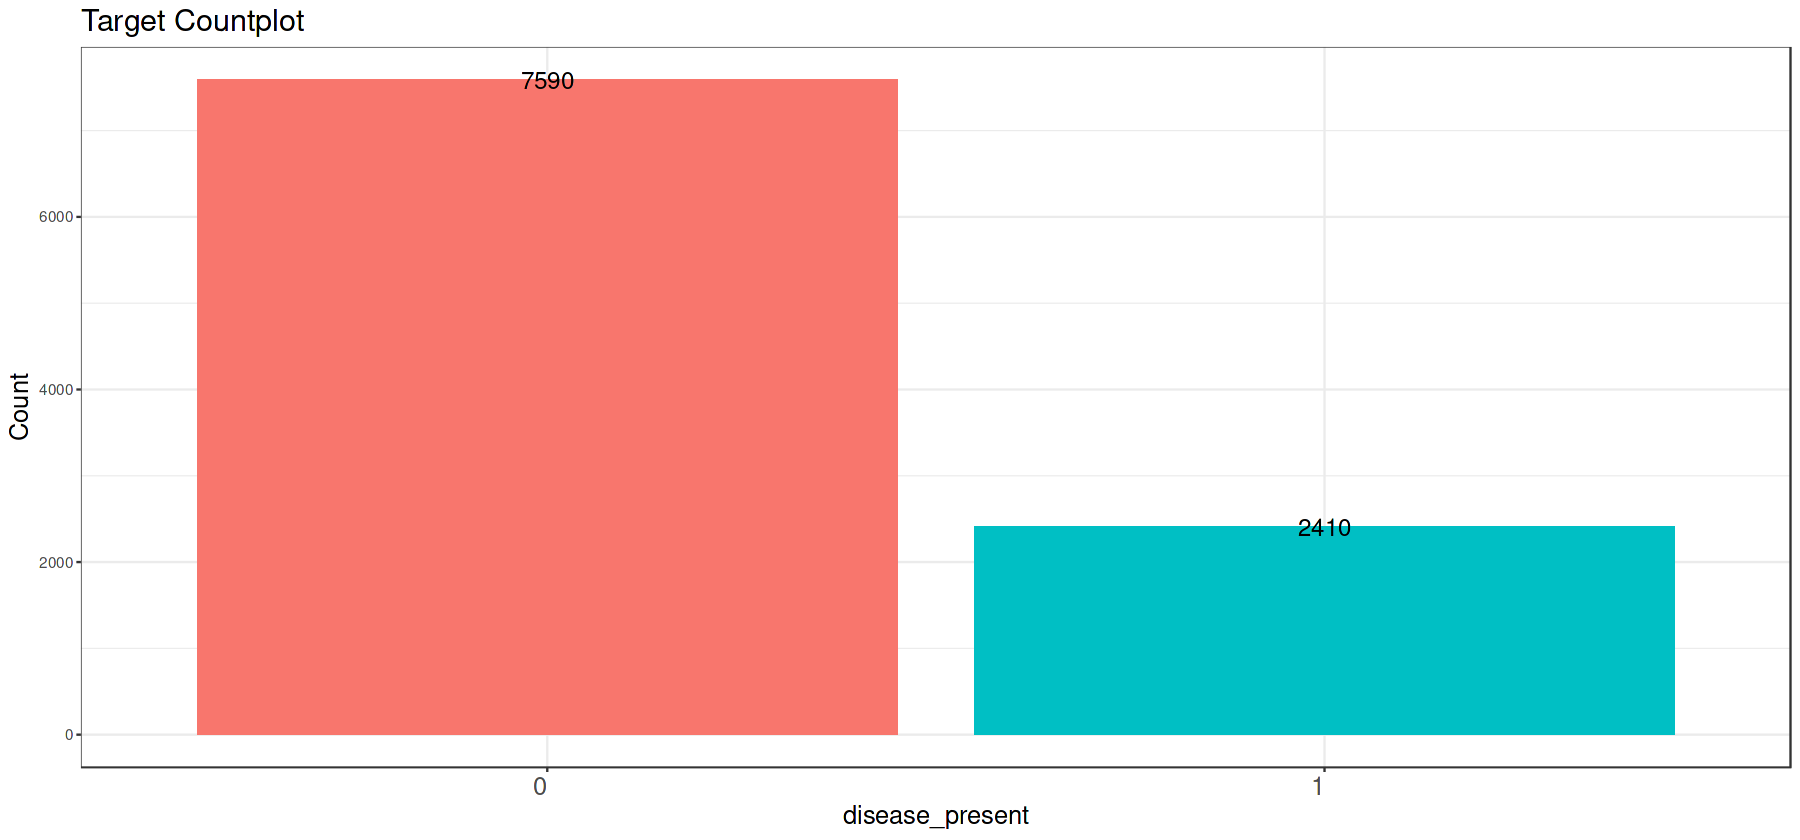

In [116]:
ggplot(target) + geom_col(aes(x= factor(disease_present), y = n, fill = factor(disease_present))) + 
            geom_text(aes(x = factor(disease_present) , y = n , label = round(n,2)),size = 5)+
            labs(title = 'Target Countplot', x= 'disease_present',y = 'Count') + 
            theme_bw() +
            theme(
                legend.position = 'none',
                axis.title = element_text(size=15),
                axis.text.x = element_text(size = 15, hjust=1 ),
                title = element_text(size=15)
            )

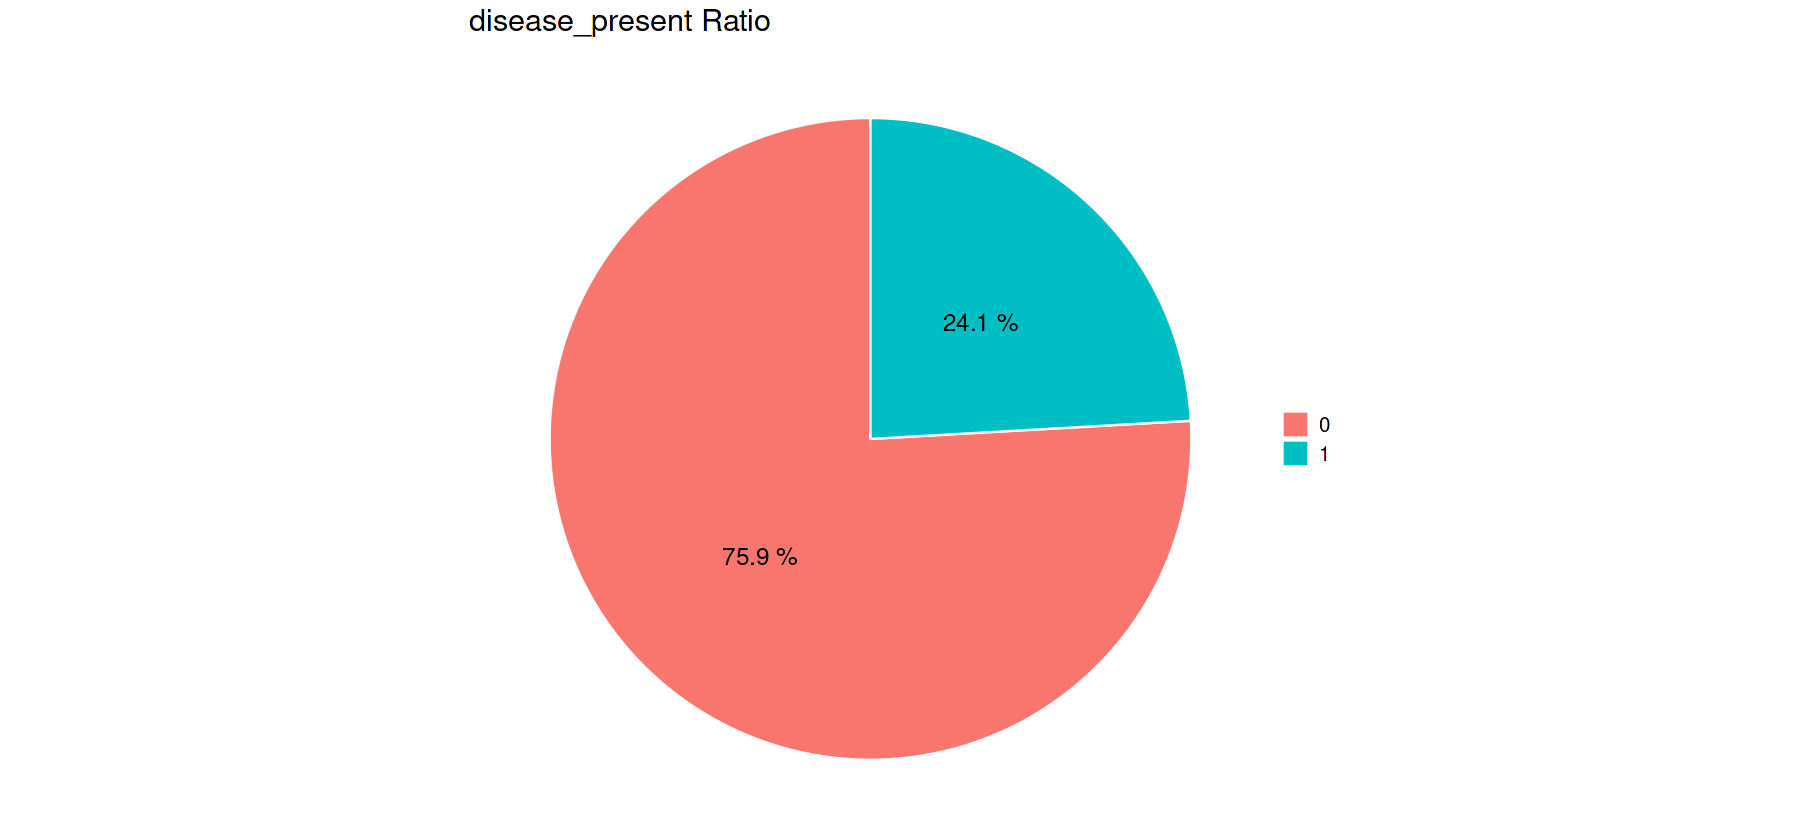

In [117]:
ggplot(target, aes(x = "", y = n, fill = factor(disease_present))) +
  geom_col(width = 1, color = "white") +  
  coord_polar("y", start = 0) +           
  geom_text(aes(label = pct), 
            position = position_stack(vjust = 0.5),
            size = 5) +                   
  labs(title = "disease_present Ratio", y = "", x = "") +
  theme_void() +
  theme(
    title = element_text(size = 15),
    legend.title = element_blank(),
    legend.text = element_text(size = 12)
  )

## **Correlation**

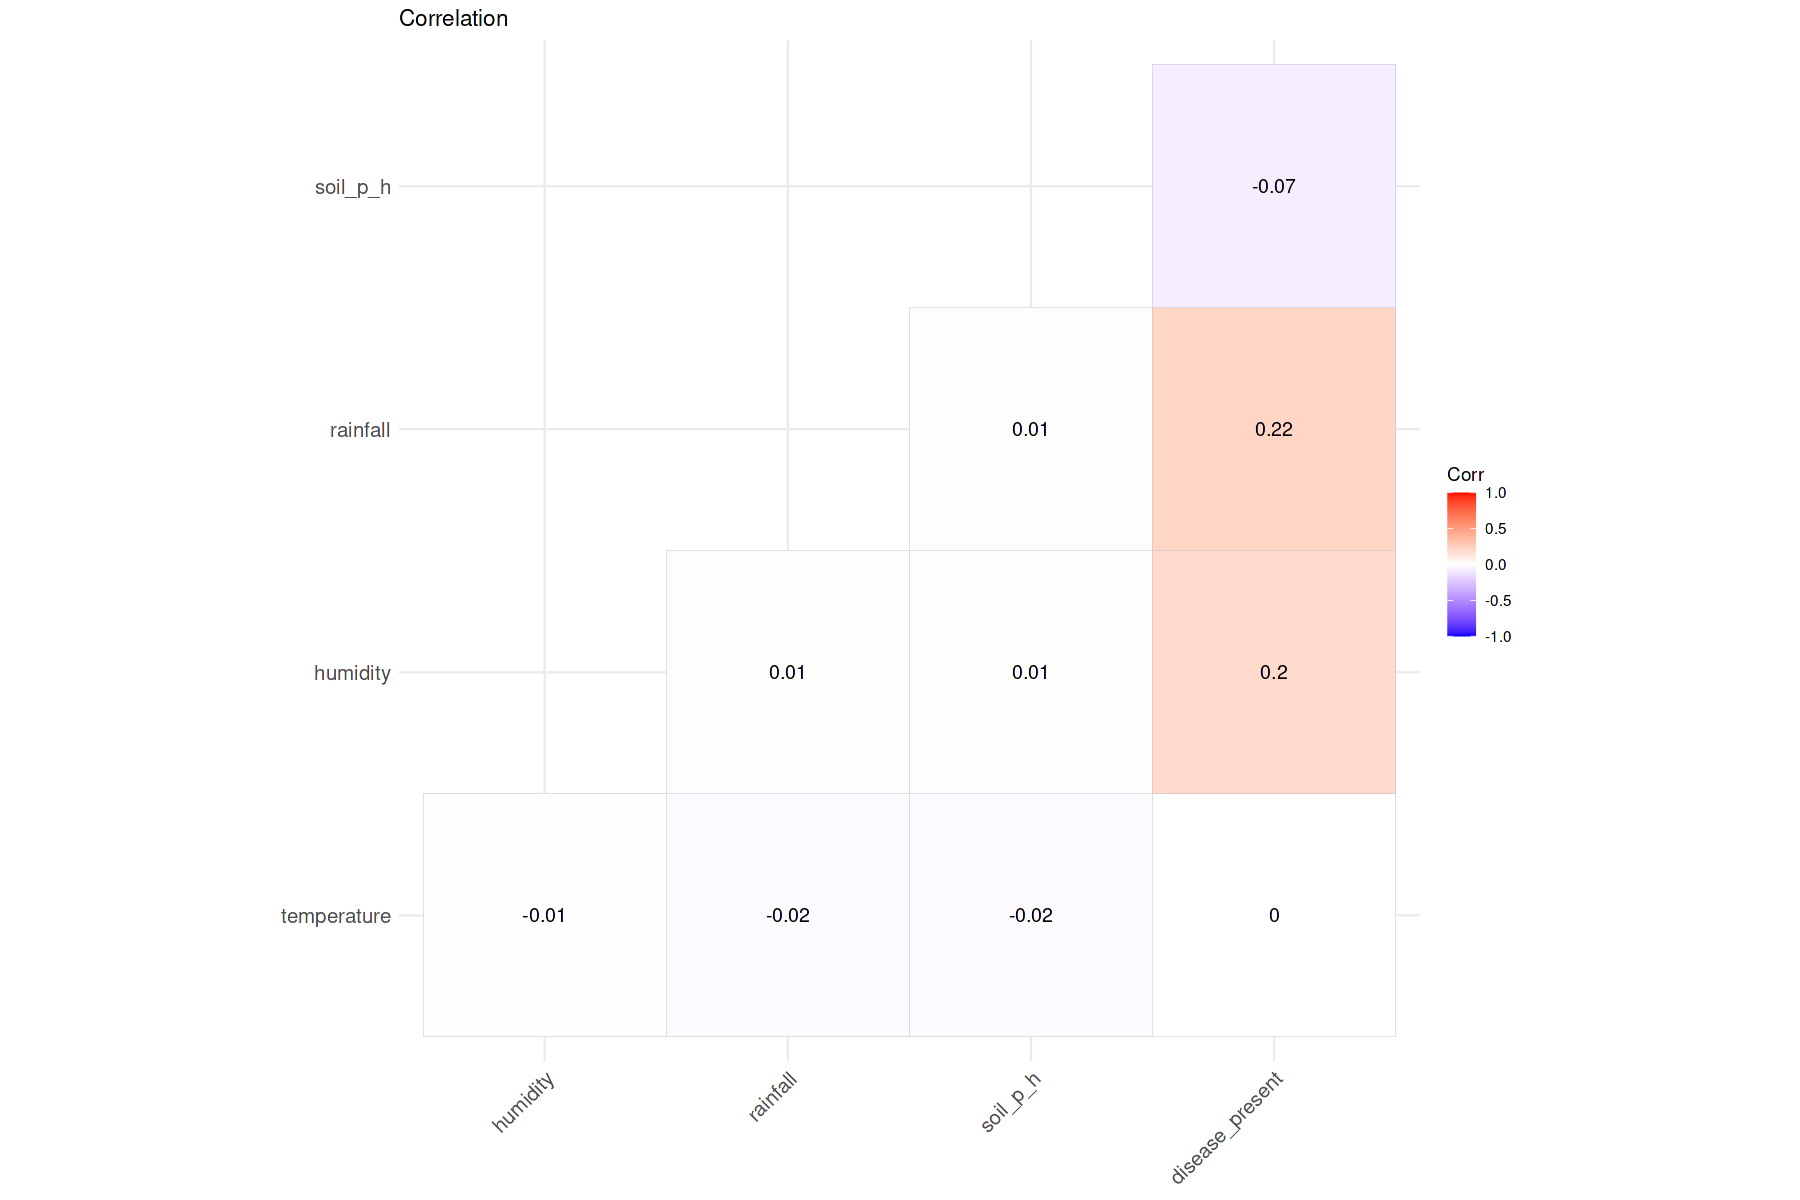

In [118]:
options(repr.plot.width = 15.0, repr.plot.height = 10.0)
ggcorrplot(cor(df[,num_cols], method = 'pearson') , type = "lower", lab=T, title = 'Correlation')

## **Correlation by Target**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


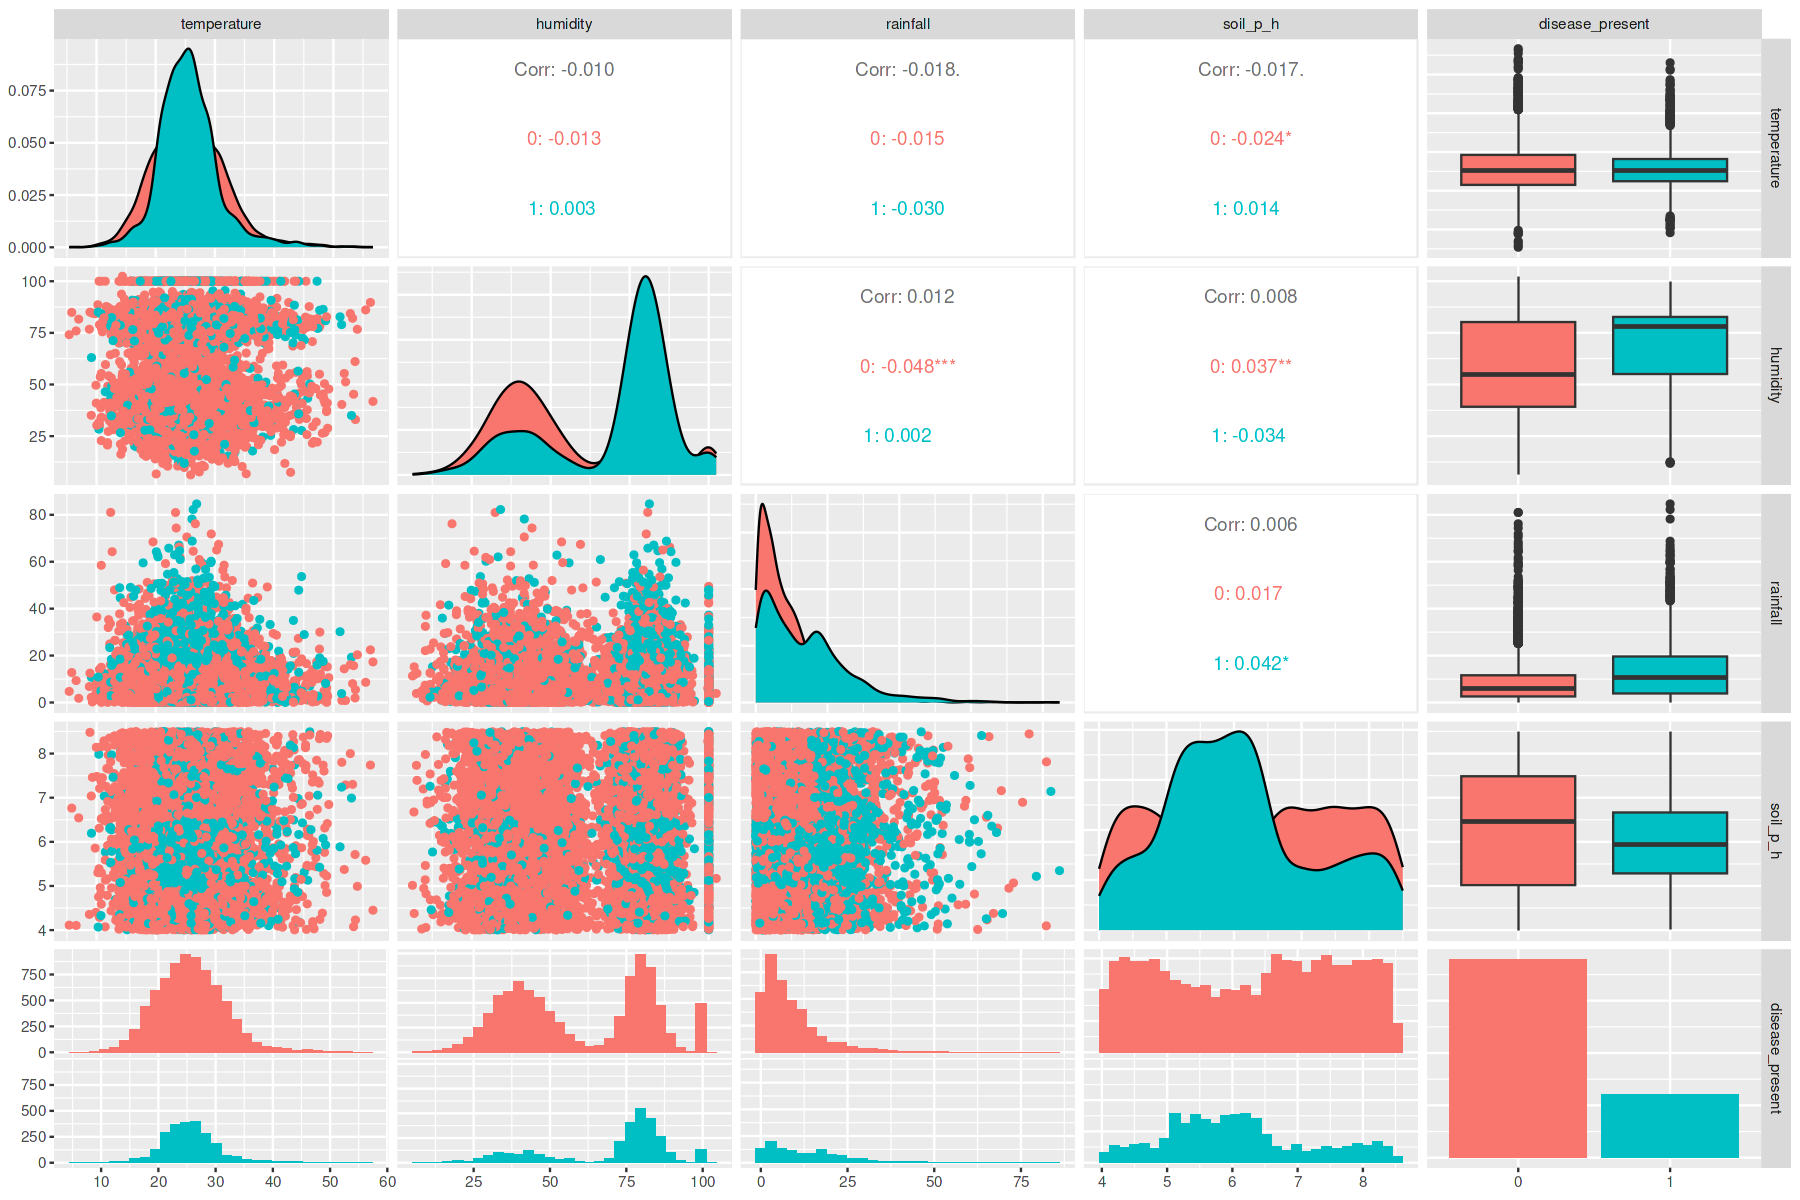

In [119]:
df2 <- df
df2$disease_present <- as.factor(df2$disease_present)
ggpairs(
  df2,
  columns = num_cols,   
  mapping = aes(color = disease_present) 
)

**All are weakly correlated with Target variables(disease_present).**

# **4. Modeling**

In [132]:
library(tidymodels)
library(caret)
library(Metrics)
library(smotefamily)

## **Preprocessing**

In [121]:
df$disease_present <- as.factor(df$disease_present)

## **Train Test Split**

In [122]:
split <- rsample::initial_split(df, prop = 0.8)
train <- rsample::training(split)
test <- rsample::testing(split)

## **Recipe**

In [124]:
rec <- recipe(disease_present ~ ., data = train) %>%
    step_zv(all_predictors())

rec



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 4



── Operations 

• Zero variance filter on: all_predictors()



## **Simple ML (Dtree)**

In [125]:
# DecisionTree

Dtree_model <-
decision_tree(mode = "classification") %>% 
  set_engine("rpart")

In [126]:
Dtree_wf <- workflow() %>%
  add_model(Dtree_model) %>%
  add_recipe(rec)

In [127]:
Dtree_fit <- fit(Dtree_wf, data = df)

## **Tree**

Warning message:
“Cannot retrieve the data used to build the model (so cannot determine roundint and is.binary for the variables).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE.”


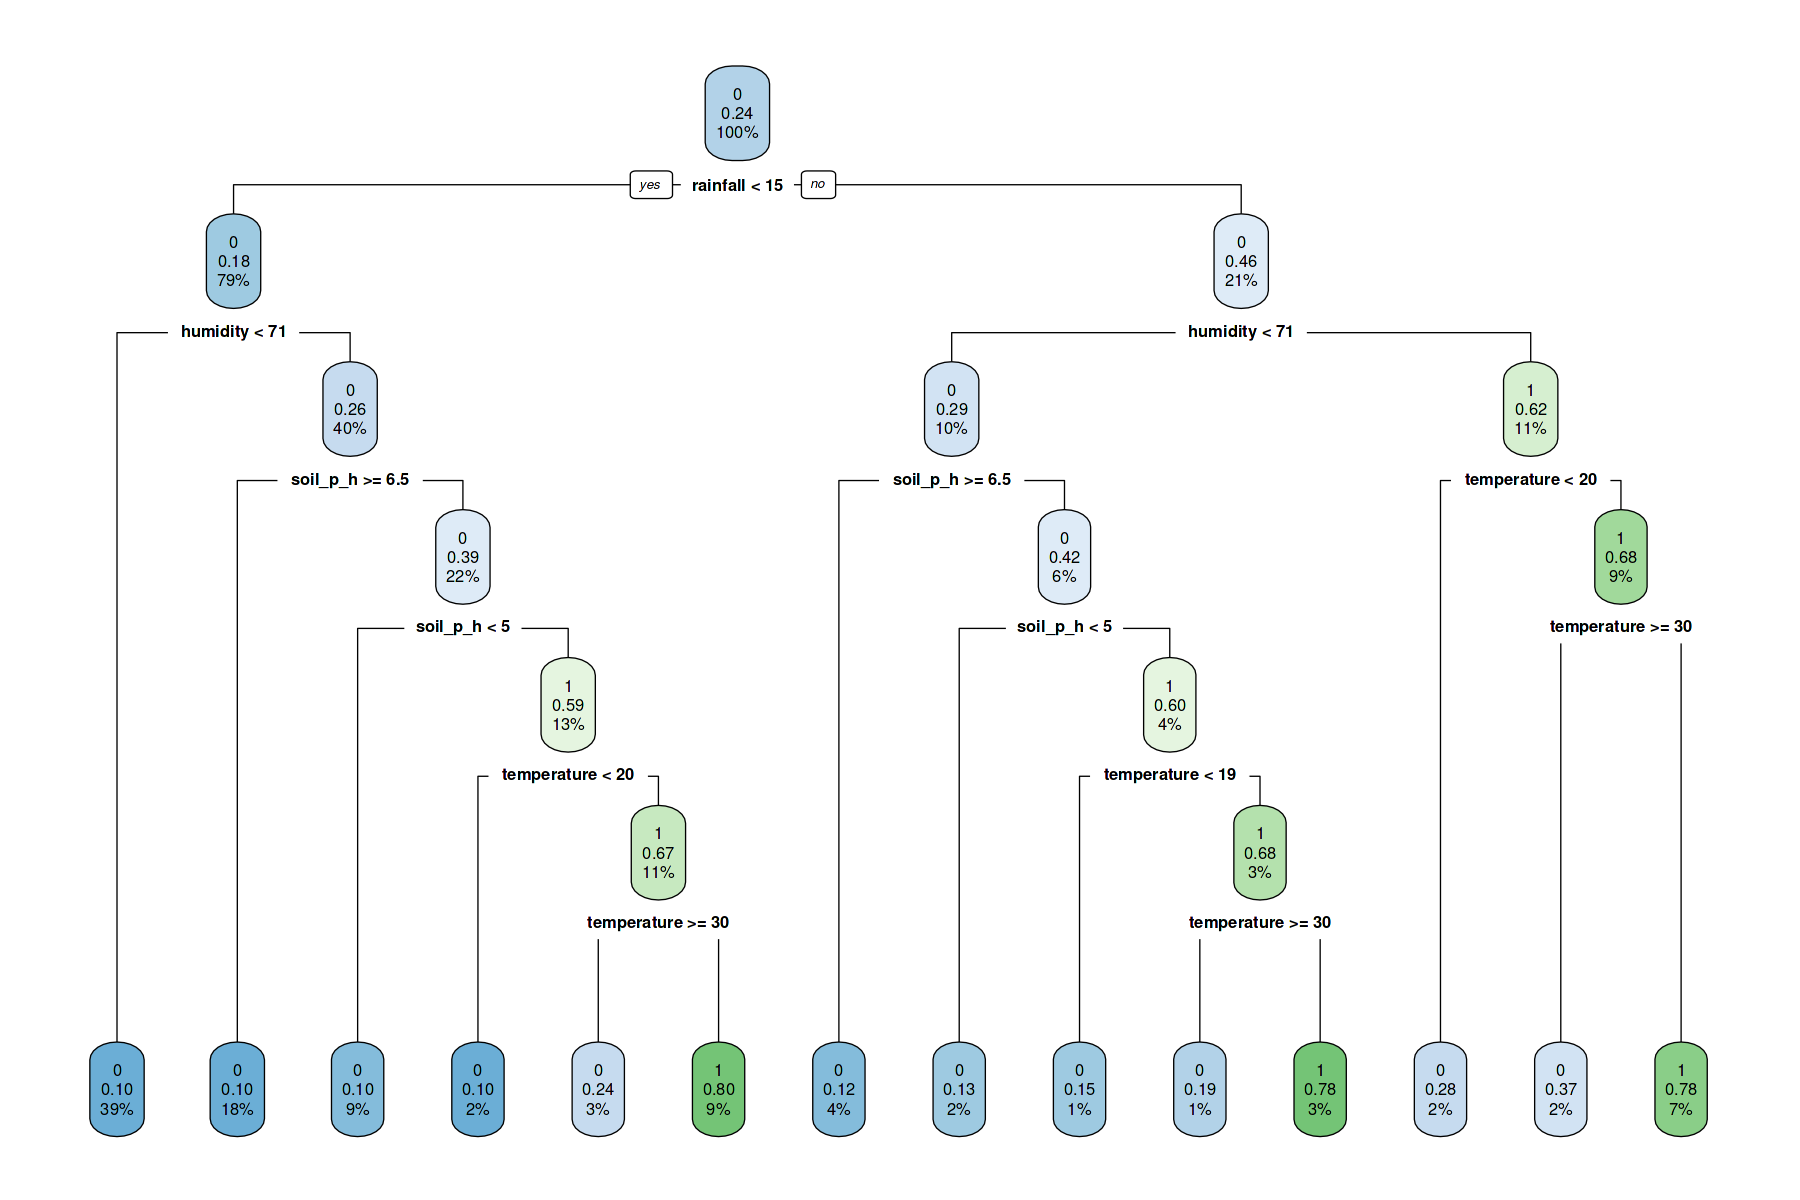

In [134]:
library(rpart.plot)
#tree
rpart_model <- extract_fit_engine(Dtree_fit)
rpart.plot(rpart_model, type = 2, extra = 106, fallen.leaves = TRUE)

In [128]:
Dtree_pred <- predict(Dtree_fit, new_data = test, type = 'class')

## **Evaluation**

In [135]:
Dtree_pred <- as.data.frame(Dtree_pred)
cm_Dtree <- confusionMatrix(Dtree_pred$.pred_class, test$disease_present)
cm_Dtree

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1439  189
         1   66  306
                                          
               Accuracy : 0.8725          
                 95% CI : (0.8571, 0.8868)
    No Information Rate : 0.7525          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6266          
                                          
 Mcnemar's Test P-Value : 2.173e-14       
                                          
            Sensitivity : 0.9561          
            Specificity : 0.6182          
         Pos Pred Value : 0.8839          
         Neg Pred Value : 0.8226          
             Prevalence : 0.7525          
         Detection Rate : 0.7195          
   Detection Prevalence : 0.8140          
      Balanced Accuracy : 0.7872          
                                          
       'Positive' Class : 0               
                        

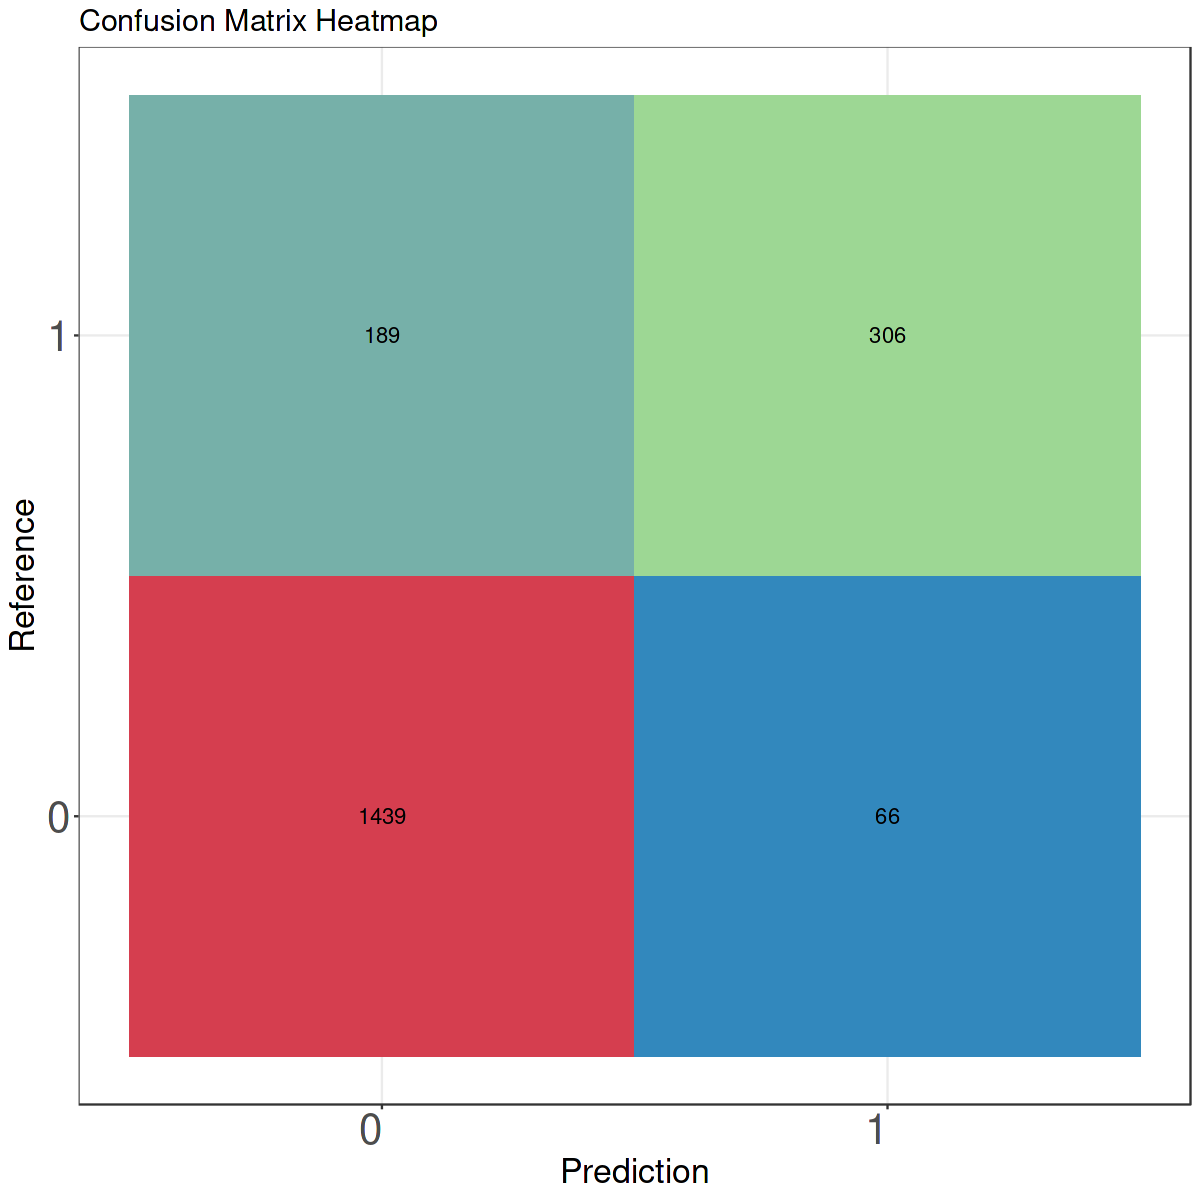

In [136]:
options(repr.plot.width = 10.0, repr.plot.height = 10.0)
#HeatMap
dtree_heatmap <- data.frame(cm_Dtree$table)

ggplot(dtree_heatmap) + geom_tile(aes(x= Prediction, y= Reference, fill = Freq)) +
                geom_text(aes(x= Prediction, y= Reference , label = Freq, size = 50), alpha = 5,) +
                scale_fill_distiller(palette = 'Spectral')+
                ggtitle('Confusion Matrix Heatmap') +
                theme_bw() +
                theme(
                legend.position = 'none',
                axis.title = element_text(size=20),
                axis.text.x = element_text(size = 25, hjust=1),
                axis.text.y = element_text(size = 25, hjust=1),
                title = element_text(size=15)
                )

## **Tune**

In [161]:
Dtree_tune_model <- decision_tree(
  cost_complexity = tune(),
  tree_depth = tune(),
  min_n = tune()
) %>%
  set_engine("rpart") %>%
  set_mode("classification")

In [165]:
Dtree_tune_wf <- workflow() %>%
  add_model(Dtree_tune_model) %>%
  add_recipe(rec)

## **5-Fold**

In [166]:
set.seed(123)
folds <- 
    train %>%
    rsample::vfold_cv(v = 5, strata = disease_present)

In [179]:
tree_params <- parameters(Dtree_tune_model)

tree_params <- tree_params %>%
  update(
    tree_depth = tree_depth(range = c(1, 10)),
    min_n = min_n(range = c(2, 20))
  )

tree_grid <- grid_regular(tree_params, levels = 10)

set.seed(123)
tuned_results <- tune_grid(
  Dtree_tune_wf,
  resamples = folds,
  grid = tree_grid,
  metrics = metric_set(yardstick::accuracy, roc_auc)

)

In [188]:
best_params <- select_best(tuned_results, metric = "accuracy")

final_tree <- finalize_workflow(Dtree_tune_wf, best_params) %>%
  fit(data = train)

In [189]:
#ROC AUC
dtree_roc_auc <- predict(final_tree, new_data = test, type = "prob") %>%
  bind_cols(test) %>%
  roc_auc(truth = disease_present, .pred_1)  

dtree_roc_auc

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
roc_auc,binary,0.1819846


Warning message:
“Cannot retrieve the data used to build the model (so cannot determine roundint and is.binary for the variables).
To silence this warning:
    Call rpart.plot with roundint=FALSE,
    or rebuild the rpart model with model=TRUE.”


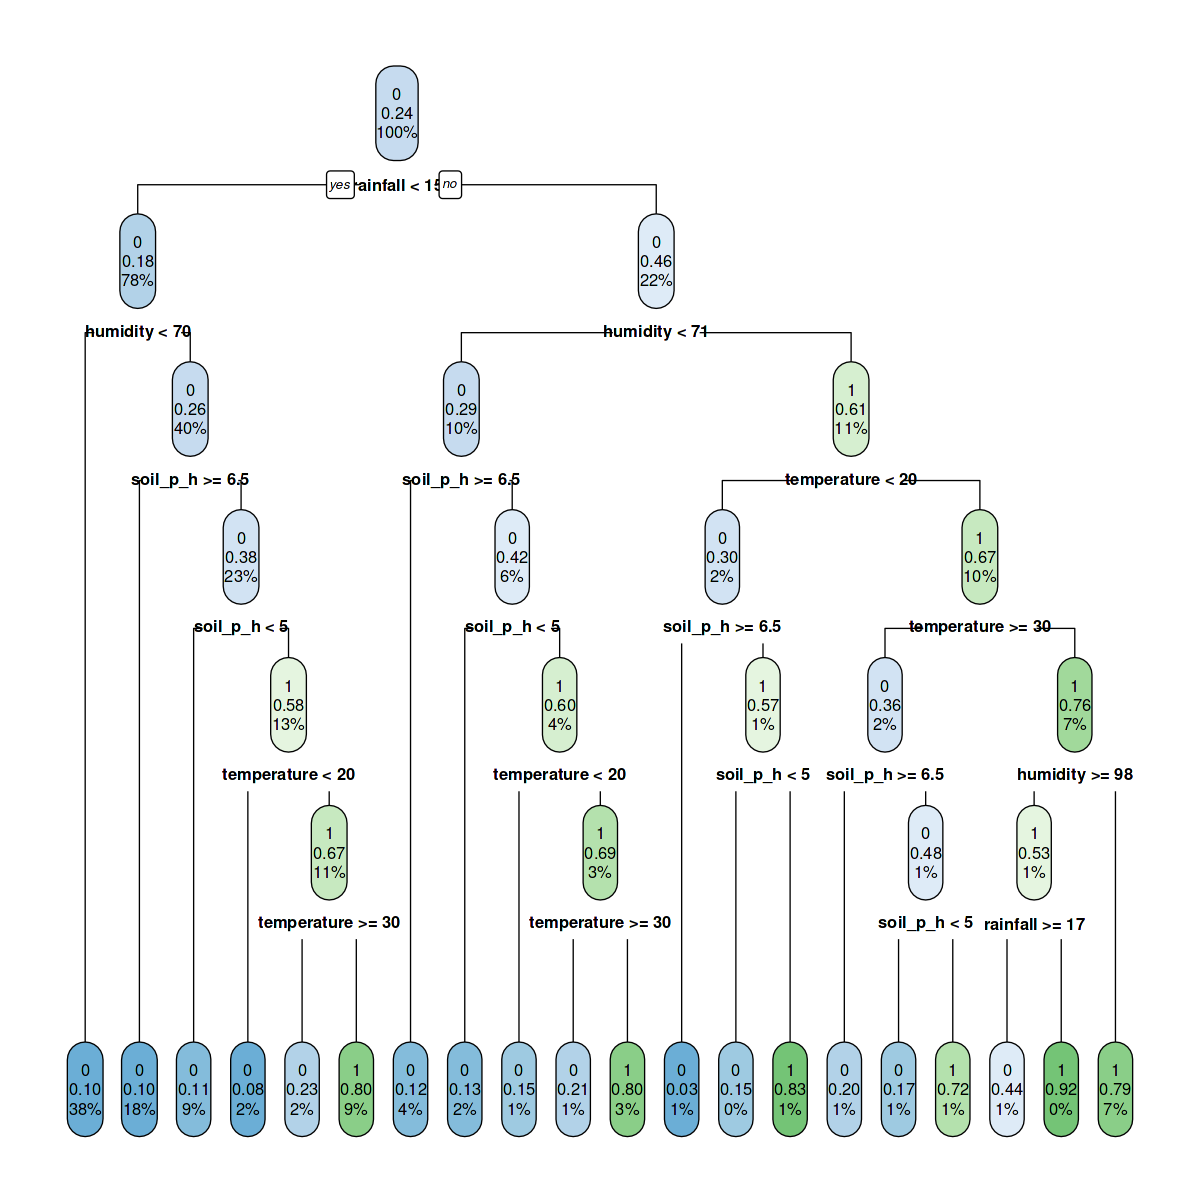

In [190]:
final_fit_engine <- extract_fit_engine(final_tree)
rpart.plot(final_fit_engine, type = 2, extra = 106)

In [191]:
dtree_final_pred <- predict(final_tree, new_data = test, type = 'class')

In [192]:
dtree_final_pred <- as.data.frame(dtree_final_pred)
cm_dtree_final<- confusionMatrix(dtree_final_pred$.pred_class, test$disease_present)
cm_dtree_final

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 1441  187
         1   64  308
                                          
               Accuracy : 0.8745          
                 95% CI : (0.8592, 0.8887)
    No Information Rate : 0.7525          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6324          
                                          
 Mcnemar's Test P-Value : 1.355e-14       
                                          
            Sensitivity : 0.9575          
            Specificity : 0.6222          
         Pos Pred Value : 0.8851          
         Neg Pred Value : 0.8280          
             Prevalence : 0.7525          
         Detection Rate : 0.7205          
   Detection Prevalence : 0.8140          
      Balanced Accuracy : 0.7898          
                                          
       'Positive' Class : 0               
                        

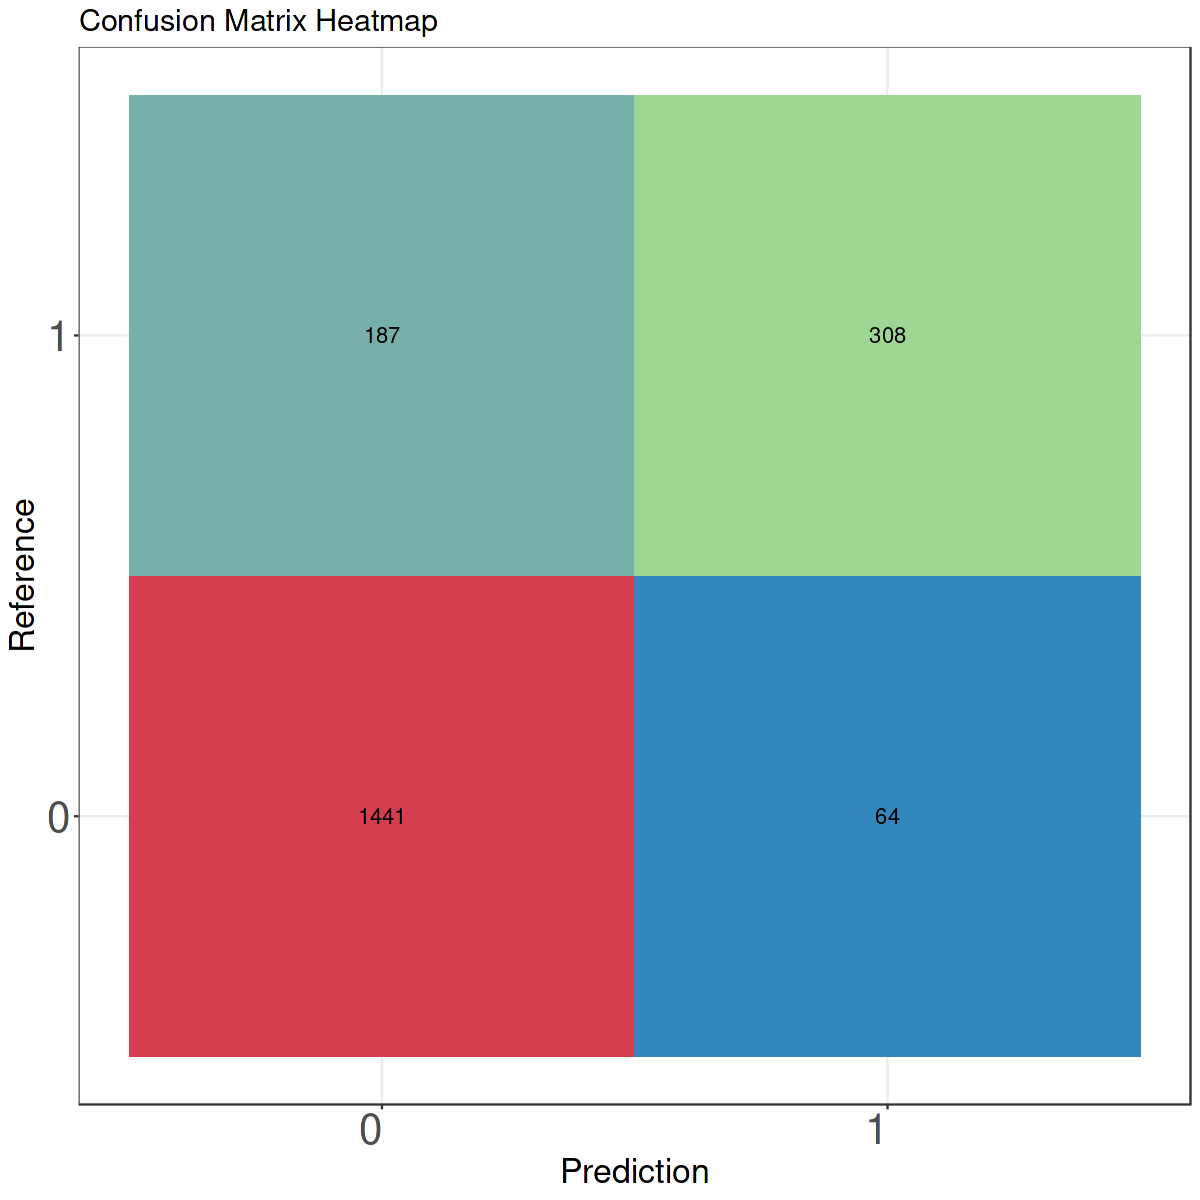

In [193]:
options(repr.plot.width = 10.0, repr.plot.height = 10.0)
#HeatMap
dtree_final_heatmap <- data.frame(cm_dtree_final$table)

ggplot(dtree_final_heatmap) + geom_tile(aes(x= Prediction, y= Reference, fill = Freq)) +
                geom_text(aes(x= Prediction, y= Reference , label = Freq, size = 50), alpha = 5,) +
                scale_fill_distiller(palette = 'Spectral')+
                ggtitle('Confusion Matrix Heatmap') +
                theme_bw() +
                theme(
                legend.position = 'none',
                axis.title = element_text(size=20),
                axis.text.x = element_text(size = 25, hjust=1),
                axis.text.y = element_text(size = 25, hjust=1),
                title = element_text(size=15)
                )

## **Feature Importance**

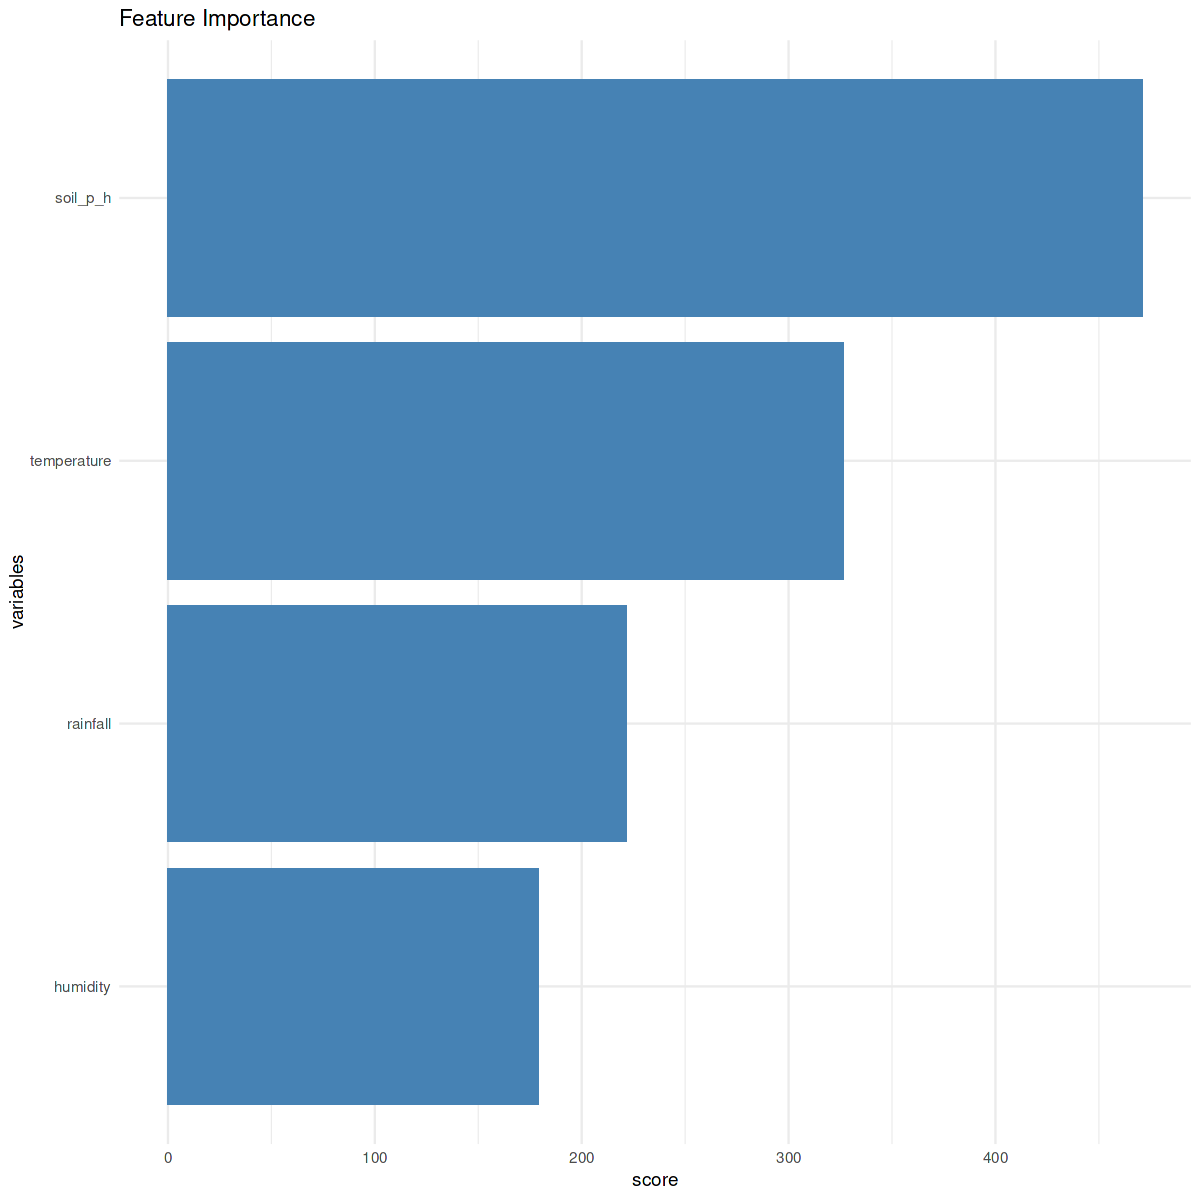

In [197]:
#Dtree
library(vip)

vip(final_tree$fit$fit, num_features = 10, geom = "col", aesthetics = list(fill = "steelblue")) +
  labs(
    title = "Feature Importance",
    x = "variables",
    y = "score"
  ) +
  theme_minimal()

**Thankyou. Please leave your advice in the comments.**